## Predictive Modeling for Insurance Claims
#### Name: Ssematimba Joel
#### Registration No: 2023/HD05/27861U
#### Student No: 2300727861
####

## 1. Data Exploration and Preprocessing:
## - Load the datasets using Pandas.
## - Explore the data's structure, distributions, and missing values.
## - Handle missing values appropriately (imputation or removal).
## - Encode categorical variables if necessary.

In [357]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler


- Load the datasets using Pandas.

In [358]:
# my dataframe
VariableDescriptionDF = pd.read_csv('dataset/VariableDescription.csv')
SampleSubmissionDF = pd.read_csv('dataset/SampleSubmission.csv')
test_dataDF = pd.read_csv('dataset/test_data.csv')
train_dataDF = pd.read_csv('dataset/train_data.csv')

##VariableDescriptionDF.head()
##SampleSubmissionDF.head()
##test_dataDF.head()
##train_dataDF.head()


- Explore the data's structure, distributions, and missing values For the Variable Description

In [359]:
VariableDescriptionDF.describe()

# test_dataDF.describe()
# train_dataDF.describe()


,Variable,Description
count,14,14
unique,14,14
top,Customer Id,Identification number for the Policy holder
freq,1,1


In [360]:
missing_values = VariableDescriptionDF.isnull()
missing_values


,Variable,Description
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [361]:
missing_values.sum()

Variable       0
Description    0
dtype: int64

- Explore the data's structure, distributions, and missing values For the Sample submission

In [362]:
print(SampleSubmissionDF)

SampleSubmissionDF.describe()

     Customer Id  Claim
0             H0      1
1         H10000      1
2         H10001      1
3         H10002      1
4         H10003      1
...          ...    ...
3063       H9987      1
3064       H9988      1
3065       H9994      1
3066       H9996      1
3067       H9998      1

[3068 rows x 2 columns]


,Claim
count,3068.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [363]:
claimDistribution = SampleSubmissionDF['Claim']
# claimDistribution

tab = pd.crosstab(index=claimDistribution, columns='count')
print(tab)
# #find proportions 
print(((tab/tab.sum())*100))


col_0  count
Claim       
1       3068
col_0  count
Claim       
1      100.0


In [364]:
# i merge the two dataset to have our target variable as part of our working dataset.

test_dataDF = test_dataDF.merge(SampleSubmissionDF, on='Customer Id', how='inner')

Explore the data's structure, distributions, and missing values For the test Data

In [365]:
test_dataDF.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,3068.000000,3068.000000,3068.000000,3055.000000,3068.000000,2340.000000,3068.0
mean,2013.593546,0.922780,0.224250,1666.845172,2.359518,1966.784615,1.0
std,1.372342,0.219097,0.417156,2251.547108,0.998605,25.243707,0.0
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1750.000000,1.0
25%,2012.000000,1.000000,0.000000,470.000000,2.000000,1960.000000,1.0
50%,2013.000000,1.000000,0.000000,900.000000,2.000000,1968.000000,1.0
75%,2015.000000,1.000000,0.000000,1957.000000,3.000000,1980.000000,1.0
max,2016.000000,1.000000,1.000000,30745.000000,4.000000,2012.000000,1.0


In [366]:
missing_values = test_dataDF.isnull()
missing_values

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063,False,False,False,False,False,False,False,False,True,False,False,False,True,False
3064,False,False,False,False,False,False,False,False,True,False,False,False,True,False
3065,False,False,False,False,False,False,False,False,True,False,False,False,True,False
3066,False,False,False,False,False,False,False,False,True,False,False,False,True,False


In [367]:
# Summary/ Summation for missing Values

missing_values.sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  4
Settlement              0
Building Dimension     13
Building_Type           0
Date_of_Occupancy     728
NumberOfWindows         0
Geo_Code               13
Claim                   0
dtype: int64

Working on Test dataset.

Handle missing values appropriately (imputation or removal). will work with imputation because Date_of_Occupancy has a significant number of missing values and i belive will affect the functionaly of the model if all these rows are deleted. Imputation with mean.

In [368]:
# We observe 4 columns with missing values from the summation printout of missing values
# Columns Date_of_Occupancy and Building Dimension have numerical dtypes, imputation with mean is possible for the columns. Replace missing values with the mean of the 
# non-missing values in the respective column.


test_dataDF['Date_of_Occupancy'].fillna(test_dataDF['Date_of_Occupancy'].mean(), inplace=True)
test_dataDF['Building Dimension'].fillna(test_dataDF['Building Dimension'].mean(), inplace=True)
# test_dataDF['Geo_Code'].fillna(test_dataDF['Geo_Code'].Median(), inplace=True)
# test_dataDF['Garden'].fillna(test_dataDF['Garden'].Median(), inplace=True)
# test_dataDF['Garden'] = test_dataDF['Garden'].interpolate(method='linear')
# test_dataDF['Garden'].fillna(method='ffill', inplace=True)
# test_dataDF['Geo_Code'].fillna(method = 'ffill', inplace=True)


# For Columns Geo_Code and Garden, i will use Forward Fill (ffill) or Backward Fill (bfill): Use the last known value (forward fill) or the next known value (backward fill) 
# to replace missing values in time series data.
test_dataDF['Geo_Code'] = test_dataDF['Geo_Code'].ffill()
test_dataDF['Garden'] = test_dataDF['Garden'].ffill()


missing_values = test_dataDF.isnull()
missing_values.sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

Sorting Categorical values in our test dataset.

In [369]:
# Inspection of the data and all columns

pd.options.display.max_columns = None
print(test_dataDF.head(20))

   Customer Id  YearOfObservation  Insured_Period  Residential  \
0       H11920               2013        1.000000            0   
1       H11921               2016        0.997268            0   
2        H9805               2013        0.369863            0   
3        H7493               2014        1.000000            0   
4        H7494               2016        1.000000            0   
5       H10545               2012        1.000000            0   
6        H8962               2015        0.986301            0   
7        H1015               2013        1.000000            0   
8        H9710               2012        1.000000            0   
9        H9029               2012        1.000000            0   
10      H11274               2012        1.000000            0   
11      H10785               2012        1.000000            0   
12      H10786               2013        0.832877            0   
13        H882               2012        1.000000            0   
14      H1

In [370]:
# Summarising columns with dtypes for the test dataset

print(test_dataDF.dtypes)

Customer Id            object
YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted       object
Building_Fenced        object
Garden                 object
Settlement             object
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows        object
Geo_Code               object
Claim                   int64
dtype: object


In [371]:
# handling categorical values,  i start with column Garden, understanding its distribution 
tab = pd.crosstab(index=test_dataDF['Garden'], columns='count')
tab/tab.sum()


col_0,count
Garden,
O,0.269231
V,0.730769


In [372]:
# convertion to numerial values
test_dataDF['Garden'] = test_dataDF['Garden'].map({'O': 0, 'V': 1})


In [373]:
# handling categorical values,  i start with column Building_Painted, understanding its distribution 
tab2 = pd.crosstab(index=test_dataDF['Building_Painted'], columns='count')
tab2/tab2.sum()

col_0,count
Building_Painted,
N,0.451108
V,0.548892


In [374]:
# convertion to numerial values
test_dataDF['Building_Painted'] = test_dataDF['Building_Painted'].map({'N': 0, 'V': 1})

In [375]:
# handling categorical values,  i start with column Building_Fenced, understanding its distribution 
tab3 = pd.crosstab(index=test_dataDF['Building_Fenced'], columns='count')
tab3/tab3.sum()

col_0,count
Building_Fenced,
N,0.270209
V,0.729791


In [376]:
# convertion to numerial values
test_dataDF['Building_Fenced'] = test_dataDF['Building_Fenced'].map({'N': 0, 'V': 1})

In [377]:
# handling categorical values,  i start with column Settlement, understanding its distribution 
tab4 = pd.crosstab(index=test_dataDF['Settlement'], columns='count')
tab4/tab4.sum()

col_0,count
Settlement,
R,0.270209
U,0.729791


In [378]:
# convertion to numerial values
test_dataDF['Settlement'] = test_dataDF['Settlement'].map({'R': 0, 'U': 1})

In [379]:
# handling categorical values,  i start with column NumberOfWindows, understanding its distribution 
tab5 = pd.crosstab(index=test_dataDF['NumberOfWindows'], columns='count')
tab5/tab5.sum()

col_0,count
NumberOfWindows,
.,0.729791
1,0.005215
2,0.022816
3,0.073990
4,0.063233
5,0.049218
6,0.022816
7,0.017601
8,0.008475


In [380]:
# convertion to numerial values
test_dataDF['NumberOfWindows'] = test_dataDF['NumberOfWindows'].map({'   .': 0,'1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9,'>=10': 10})

In [381]:
# handling categorical values,  i start with column NumberOfWindows, understanding its distribution 
tab6 = pd.crosstab(index=test_dataDF['NumberOfWindows'], columns='count')
tab6/tab6.sum()

col_0,count
NumberOfWindows,
0,0.729791
1,0.005215
2,0.022816
3,0.073990
4,0.063233
5,0.049218
6,0.022816
7,0.017601
8,0.008475


In [382]:
# dummy = pd.get_dummies(test_dataDF['Geo_Code'])
# dummy.head()
# dummy2 = pd.concat((test_dataDF, dummy), axis=1)

# print(dummy2)

print(test_dataDF.dtypes)

Customer Id            object
YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted        int64
Building_Fenced         int64
Garden                  int64
Settlement              int64
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows         int64
Geo_Code               object
Claim                   int64
dtype: object


In [383]:
# handling categorical values,  i start with column Geo_Code, understanding its distribution 
tab7 = pd.crosstab(index=test_dataDF['Geo_Code'], columns='count')
tab7/tab7.sum()

col_0,count
Geo_Code,
10333,0.000326
11262,0.001630
11441,0.000326
12052,0.000326
12145,0.000326
...,...
95313,0.000652
95394,0.000326
95500,0.000326


## Working on Train dataset.

Handle missing values appropriately (imputation or removal). will work with imputation because Date_of_Occupancy has a significant number of missing values and i belive will affect the functionaly of the model if all these rows are deleted. Imputation with mean.

In [384]:
train_dataDF.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


In [385]:
# Working on missing values for the train dataset

missing_values = train_dataDF.isnull()
missing_values


,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7155,False,False,False,False,False,False,False,False,True,False,False,False,True,False
7156,False,False,False,False,False,False,False,False,True,False,False,False,True,False
7157,False,False,False,False,False,False,False,False,True,False,False,False,True,False
7158,False,False,False,False,False,False,False,False,True,False,False,False,True,False


In [386]:
missing_values.sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [387]:
# We observe 4 columns with missing values from the summation printout of missing values
# Columns Date_of_Occupancy and Building Dimension have numerical dtypes, imputation with mean is possible for the columns. Replace missing values with the mean of the 
# non-missing values in the respective column.


train_dataDF['Date_of_Occupancy'].fillna(train_dataDF['Date_of_Occupancy'].mean(), inplace=True)
train_dataDF['Building Dimension'].fillna(train_dataDF['Building Dimension'].mean(), inplace=True)

# For Columns Geo_Code and Garden, i will use Forward Fill (ffill) or Backward Fill (bfill): Use the last known value (forward fill) or the next known value (backward fill) 
# to replace missing values in time series data.
train_dataDF['Geo_Code'] = train_dataDF['Geo_Code'].ffill()
train_dataDF['Garden'] = train_dataDF['Garden'].ffill()


missing_values = train_dataDF.isnull()
missing_values.sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

In [388]:
## commercing sorting of categorical data

train_dataDF.dtypes

Customer Id            object
YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted       object
Building_Fenced        object
Garden                 object
Settlement             object
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows        object
Geo_Code               object
Claim                   int64
dtype: object

In [389]:
def get_categorical_columns(train_dataDF):
  categorical_columns = []
  for column in train_dataDF.columns:
    if train_dataDF[column].dtype == 'object':
      categorical_columns.append(column)
  return categorical_columns


# Get the categorical columns.
categorical_columns = get_categorical_columns(train_dataDF)

# Print the categorical columns.
print(categorical_columns)

['Customer Id', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'NumberOfWindows', 'Geo_Code']


## mapping all categorical data in train dataset

In [390]:
train_dataDF['Garden'] = train_dataDF['Garden'].map({'O': 0, 'V': 1})
train_dataDF['Building_Painted'] = train_dataDF['Building_Painted'].map({'N': 0, 'V': 1})
train_dataDF['Building_Fenced'] = train_dataDF['Building_Fenced'].map({'N': 0, 'V': 1})
train_dataDF['Settlement'] = train_dataDF['Settlement'].map({'R': 0, 'U': 1})
train_dataDF['NumberOfWindows'] = train_dataDF['NumberOfWindows'].map({'   .': 0,'1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9,'>=10': 10})

train_dataDF.dtypes

Customer Id            object
YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted        int64
Building_Fenced         int64
Garden                  int64
Settlement              int64
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows         int64
Geo_Code               object
Claim                   int64
dtype: object

In [391]:
# handling categorical values,  i start with column Garden, understanding its distribution 
taba = pd.crosstab(index=train_dataDF['Geo_Code'], columns='count')
taba/taba.sum()

col_0,count
Geo_Code,
10033,0.000140
10081,0.000140
10297,0.000140
10333,0.000559
10343,0.000140
...,...
95563,0.000419
95582,0.000419
95585,0.000978


## 2. Feature Selection:
## - Select relevant features for building the predictive model.
## - Justify the selection of features based on insights from the data exploration

In [392]:
def get_categorical_columns(df):
  categorical_columns = []
  for column in train_dataDF.columns:
    if train_dataDF[column].dtype == 'object':
      categorical_columns.append(column)
  return categorical_columns


# Get the categorical columns.
categorical_columns = get_categorical_columns(train_dataDF)

# Print the categorical columns.
print(categorical_columns)
train_data = train_dataDF
train_dataDF = train_dataDF.drop(columns=categorical_columns)

train_dataDF.dtypes

['Customer Id', 'Geo_Code']


YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted        int64
Building_Fenced         int64
Garden                  int64
Settlement              int64
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows         int64
Claim                   int64
dtype: object

#### Features selected with high correlation with Claim, Features like customer ID and Geo Code are droped.

Claim                 1.000000
Building Dimension    0.295216
NumberOfWindows       0.136705
Building_Type         0.112168
Insured_Period        0.088715
Residential           0.063509
Garden                0.052626
Settlement            0.052019
Building_Fenced       0.051657
Building_Painted      0.029857
Date_of_Occupancy     0.018537
YearOfObservation     0.016367
Name: Claim, dtype: float64
['Claim', 'Building Dimension', 'NumberOfWindows', 'Building_Type', 'Insured_Period', 'Residential', 'Garden', 'Settlement', 'Building_Fenced']


<Axes: >

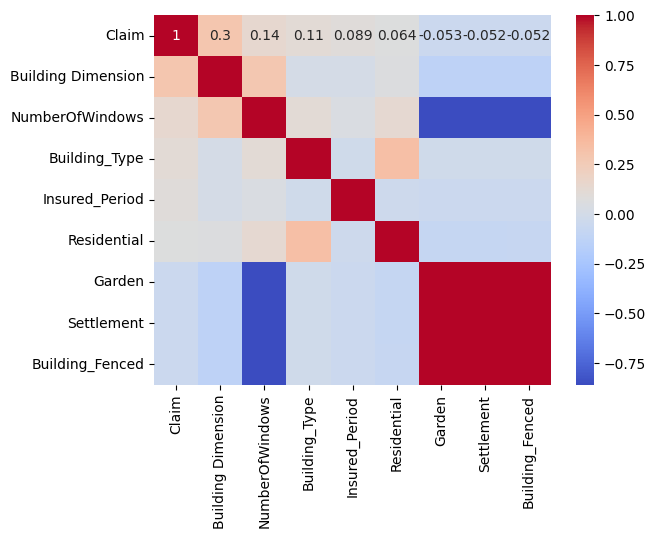

In [393]:
# Calculate the correlation between Claim and other columns 
corr_return = train_dataDF.corr()['Claim'].abs().sort_values(ascending=False)
print(corr_return)

# Selection  with correlation threshold(0.1)
threshold_targets = corr_return[corr_return > 0.05].index.tolist()
print(threshold_targets)

# Calculate the correlation matrix between features
feature_matrix = train_dataDF[threshold_targets].corr()
# print(print(threshold_targets))

# Visualize the correlation matrix (optional)
import seaborn as sns
sns.heatmap(feature_matrix, annot=True, cmap='coolwarm')

## 3. Model Building:
## - Implement SVM, Linear Regression, KNN, and Naive Bayes models using Scikit-Learn.
## - Train the models using the training dataset.
## - Tune hyperparameters for each model using techniques like Grid Search or Random Search.


#### Scaling the training data.

In [394]:
# Scaling using Standard scaler

scaler = StandardScaler()

train_dataDF.drop('Claim', axis=1)  
train_dataDF = pd.DataFrame(train_dataDF)


#pass arry of clumns
# columns_to_scale = threshold_targets 

columns_to_scale = ['Building Dimension', 'NumberOfWindows', 'Building_Type', 'Insured_Period', 'Residential', 'Garden', 'Settlement', 'Building_Fenced']
 


# print(columns_to_scale)

scaled_columns = pd.DataFrame(scaler.fit_transform(train_dataDF[columns_to_scale]), columns=columns_to_scale)
# print(scaled_columns)

train_dataDF = pd.concat([scaled_columns, train_dataDF.drop(columns_to_scale, axis=1)], axis=1)
train_dataDF = train_dataDF[threshold_targets]
print(train_dataDF)


      Claim  Building Dimension  NumberOfWindows  Building_Type  \
0         0           -0.704855        -0.867014      -1.260978   
1         0           -0.616401         0.721070      -1.260978   
2         0           -0.569963        -0.867014      -1.260978   
3         0            0.422929        -0.867014      -1.260978   
4         0           -0.532370         0.324049      -1.260978   
...     ...                 ...              ...            ...   
7155      0            0.000000        -0.867014      -1.260978   
7156      1            0.000000        -0.867014      -0.197789   
7157      0            0.000000        -0.867014      -1.260978   
7158      0            0.000000        -0.867014      -1.260978   
7159      0            0.000000        -0.867014      -1.260978   

      Insured_Period  Residential    Garden  Settlement  Building_Fenced  
0           0.376419    -0.663155  1.007289    1.008415         1.007852  
1           0.376419    -0.663155 -0.992764  

#### Scaling the test data.

In [395]:
# Scaling using Standard scaler

scaler = MinMaxScaler()

test_dataDF = pd.DataFrame(test_dataDF)
test_data = pd.DataFrame(test_dataDF)

#pass arry of clumns
# columns_to_scale = threshold_targets
columns_to_scale = ['Building Dimension', 'NumberOfWindows', 'Building_Type', 'Insured_Period', 'Residential', 'Garden', 'Settlement', 'Building_Fenced']

scaled_columns = pd.DataFrame(scaler.fit_transform(test_dataDF[columns_to_scale]), columns=columns_to_scale)
test_dataDF = pd.concat([scaled_columns, test_dataDF.drop(columns_to_scale, axis=1)], axis=1)
test_dataDF = train_dataDF[threshold_targets]
print(test_dataDF)

      Claim  Building Dimension  NumberOfWindows  Building_Type  \
0         0           -0.704855        -0.867014      -1.260978   
1         0           -0.616401         0.721070      -1.260978   
2         0           -0.569963        -0.867014      -1.260978   
3         0            0.422929        -0.867014      -1.260978   
4         0           -0.532370         0.324049      -1.260978   
...     ...                 ...              ...            ...   
7155      0            0.000000        -0.867014      -1.260978   
7156      1            0.000000        -0.867014      -0.197789   
7157      0            0.000000        -0.867014      -1.260978   
7158      0            0.000000        -0.867014      -1.260978   
7159      0            0.000000        -0.867014      -1.260978   

      Insured_Period  Residential    Garden  Settlement  Building_Fenced  
0           0.376419    -0.663155  1.007289    1.008415         1.007852  
1           0.376419    -0.663155 -0.992764  

#### Implement SVM

In [396]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# defining the train x and y
X_train_SVM = train_dataDF.drop('Claim', axis=1)  
y_train_SVM = train_dataDF['Claim']

test_dataDF
# defining the test x and y
X_test_SVM = test_dataDF.drop('Claim', axis=1)  
y_test_SVM = test_dataDF['Claim']

# Check the shapes of the resulting sets
print("Shape of X_train:", X_train_SVM.shape)
print("Shape of X_test:", X_test_SVM.shape)
print("Shape of y_train:", y_train_SVM.shape)
print("Shape of y_test:", y_test_SVM.shape)


# SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)

# svm_classifier = SVC(kernel = 'rbf', random_state = 0)
svm_classifier.fit(X_train_SVM, y_train_SVM)


#predictions on the test set
y_pred_SVM = svm_classifier.predict(X_test_SVM)

# Evaluate the performance
accuracy = accuracy_score(y_test_SVM, y_pred_SVM)
conf_matrix = confusion_matrix(y_test_SVM, y_pred_SVM)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


report = classification_report(y_test_SVM, y_pred_SVM)
print("Classification Report:\n", report)
print("Confusion Matrix: \n", classification_report)

Shape of X_train: (7160, 8)
Shape of X_test: (7160, 8)
Shape of y_train: (7160,)
Shape of y_test: (7160,)
Accuracy: 0.771927374301676
Confusion Matrix:
 [[5526    0]
 [1633    1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87      5526
           1       1.00      0.00      0.00      1634

    accuracy                           0.77      7160
   macro avg       0.89      0.50      0.44      7160
weighted avg       0.82      0.77      0.67      7160

Confusion Matrix: 
 <function classification_report at 0x00000143504F4680>


#### Tune hyperparameters for each model using techniques like Grid Search or Random Search For SVM


In [397]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_test_SVM, y_test_SVM)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.772 total time=   2.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.772 total time=   3.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.772 total time=   3.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.772 total time=   3.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.772 total time=   3.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.777 total time=   2.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.779 total time=   3.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.780 total time=   1.9s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.776 total time=   1.8s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.773 total time=   2.3s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.772 total time=   2.4s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.772 total time=   2.5s
[CV 3/5] END .....C=0.1, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 10], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [398]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


In [399]:
grid_predictions = grid.predict(X_test_SVM) 

accuracy = accuracy_score(y_test_SVM, y_pred_SVM)
# conf_matrix = confusion_matrix(y_test_SVM, y_pred)

print("Accuracy:", accuracy)
# print classification report 
print(classification_report(y_test_SVM, grid_predictions)) 

Accuracy: 0.771927374301676
              precision    recall  f1-score   support

           0       0.79      0.98      0.88      5526
           1       0.71      0.13      0.22      1634

    accuracy                           0.79      7160
   macro avg       0.75      0.56      0.55      7160
weighted avg       0.77      0.79      0.73      7160



#### Implement Linear Regression

Shape of X_train: (7160, 8)
Shape of X_test: (7160, 8)
Shape of y_train: (7160,)
Shape of y_test: (7160,)
Mean Squared Error: 0.15641826083993285
R-squared: 0.11192311842895353
Shape of X_test:  (7160, 8)
Shape of Y_test:  (7160,)
(7160,)
(7160,)


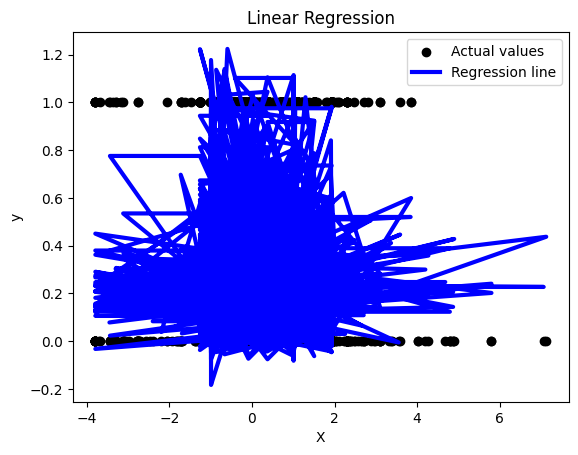

In [400]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# defining the train x and y
X_train_LR = train_dataDF.drop('Claim', axis=1)  
y_train_LR = train_dataDF['Claim']

test_dataDF
# defining the test x and y
X_test_LR = test_dataDF.drop('Claim', axis=1)  
y_test_LR = test_dataDF['Claim']

# Create a Linear Regression model
linear_reg = LinearRegression()

# Check the shapes of the resulting sets
print("Shape of X_train:", X_train_LR.shape)
print("Shape of X_test:", X_test_LR.shape)
print("Shape of y_train:", y_train_LR.shape)
print("Shape of y_test:", y_test_LR.shape)

# Train the model
linear_reg.fit(X_train_LR, y_train_LR)

# Make predictions on the test set
y_pred_LR = linear_reg.predict(X_test_LR)

# Evaluate the model
mse = mean_squared_error(y_test_LR, y_pred_LR)
r2 = r2_score(y_test_LR, y_pred_LR)

print("Mean Squared Error:", mse)
print("R-squared:", r2)



print("Shape of X_test: ", X_test_LR.shape)
# print(.shape)
# print(X_test_LR.shape)
print("Shape of Y_test: ",y_test_LR.shape)
# print(y_test_LR.)

# X_test_LR=np.arange(0,len(X_test_LR),1)
# Checking if the reshaped arrays have the same size
if X_test_LR.size != y_test_LR.size:
    # Resizing the arrays to match each other
    mininmum_size = min(X_test_LR.size, y_test_LR.size)
    X_test_LR = np.resize(X_test_LR, (mininmum_size,))
    y_test_LR = np.resize(y_test_LR, (mininmum_size,))


print(X_test_LR.shape)
print(y_test_LR.shape)



plt.scatter(X_test_LR, y_test_LR, color='black', label='Actual values')
plt.plot(X_test_LR, y_pred_LR, color='blue', linewidth=3, label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

#### Impementation of KNN model


In [401]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,  classification_report



# defining the train x and y
X_train_KNN = train_dataDF.drop('Claim', axis=1)  
y_train_KNN = train_dataDF['Claim']

test_dataDF
# defining the test x and y
X_test_KNN = test_dataDF.drop('Claim', axis=1)  
y_test_KNN = test_dataDF['Claim']

# Check the shapes of the resulting sets

print("Shape of X_train:", X_train_KNN.shape)
print("Shape of X_test:", X_test_KNN.shape)
print("Shape of y_train:", y_train_KNN.shape)
print("Shape of y_test:", y_test_KNN.shape)


#KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)


# Train the classifier
knn_classifier.fit(X_train_KNN, y_train_KNN)

# Make predictions on the test set
y_pred_KNN = knn_classifier.predict(X_test_KNN)

# Evaluate the performance
accuracy = accuracy_score(y_test_KNN, y_pred_KNN)
conf_matrix = confusion_matrix(y_test_KNN, y_pred_KNN)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

report = classification_report(y_test_KNN, y_pred_KNN)
print("Classification Report:\n", report)
print("Confusion Matrix: \n", classification_report)

Shape of X_train: (7160, 8)
Shape of X_test: (7160, 8)
Shape of y_train: (7160,)
Shape of y_test: (7160,)
Accuracy: 0.841340782122905
Confusion Matrix:
 [[5179  347]
 [ 789  845]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      5526
           1       0.71      0.52      0.60      1634

    accuracy                           0.84      7160
   macro avg       0.79      0.73      0.75      7160
weighted avg       0.83      0.84      0.83      7160

Confusion Matrix: 
 <function classification_report at 0x00000143504F4680>


#### Tune hyperparameters Grid Search or Random Search For KNN


In [402]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': [3, 5, 7]}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(knn_classifier, param_grid, cv=3)

grid_search.fit(X_train_KNN, y_train_KNN)

# Best hyperparameters
best_k = grid_search.best_params_['n_neighbors']

# creating the final model
final_knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
final_knn_classifier.fit(X_train_KNN, y_train_KNN)

# Make predictions on the test set
y_pred = final_knn_classifier.predict(X_test_KNN)
# Evaluate the performance
accuracy = accuracy_score(y_test_KNN, y_pred)
conf_matrix = confusion_matrix(y_test_KNN, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

report = classification_report(y_test_KNN, y_pred)
print("Classification Report:\n", report)
print("Confusion Matrix: \n", classification_report)

Accuracy: 0.8124301675977653
Confusion Matrix:
 [[5249  277]
 [1066  568]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      5526
           1       0.67      0.35      0.46      1634

    accuracy                           0.81      7160
   macro avg       0.75      0.65      0.67      7160
weighted avg       0.79      0.81      0.79      7160

Confusion Matrix: 
 <function classification_report at 0x00000143504F4680>


## Implement of Naive Bayes models

In [403]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix,  classification_report



# defining the train x and y
X_train_GNB = train_dataDF.drop('Claim', axis=1)  
y_train_GNB = train_dataDF['Claim']

test_dataDF
# defining the test x and y
X_test_GNB = test_dataDF.drop('Claim', axis=1)  
y_test_GNB = test_dataDF['Claim']

# Check the shapes of the resulting sets

# print("Shape of X_train:", X_train_GNB.shape)
# print("Shape of X_test:", X_test_GNB.shape)
# print("Shape of y_train:", y_train_GNB.shape)
# print("Shape of y_test:", y_test_GNB.shape)


# Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()


# Train the classifier
naive_bayes_classifier.fit(X_train_GNB, y_train_GNB)

# predictions on the test set
y_pred_GNB = naive_bayes_classifier.predict(X_test_GNB)

# Performance Evaluation
accuracy = accuracy_score(y_test_GNB, y_pred_GNB)
conf_matrix = confusion_matrix(y_test_GNB, y_pred_GNB)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

report = classification_report(y_test_GNB, y_pred_GNB)
print("Classification Report:\n", report)
print("Confusion Matrix: \n", classification_report)

Accuracy: 0.7715083798882681
Confusion Matrix:
 [[5049  477]
 [1159  475]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86      5526
           1       0.50      0.29      0.37      1634

    accuracy                           0.77      7160
   macro avg       0.66      0.60      0.61      7160
weighted avg       0.74      0.77      0.75      7160

Confusion Matrix: 
 <function classification_report at 0x00000143504F4680>


## Model Evaluation: Evaluate the models using the Area Under the Curve (AUC) metric.

## SVM Evaluation

In [404]:
from sklearn.metrics import roc_auc_score, roc_curve

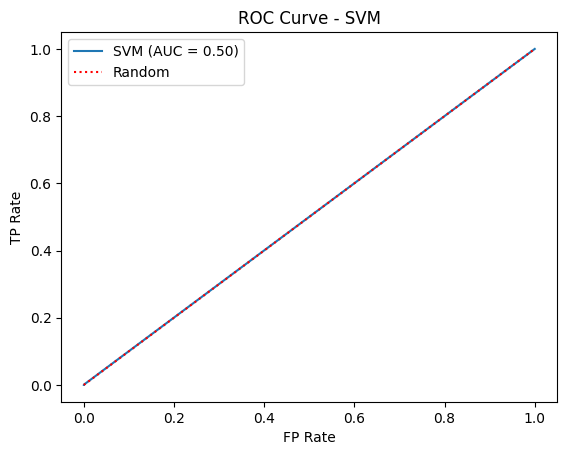

In [405]:
auc_SVM = roc_auc_score(y_test_SVM, y_pred_SVM)

fpr_svm, tpr_svm, _= roc_curve(y_test_SVM, y_pred_SVM)

plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_SVM:.2f})')

plt.plot([0, 1], [0, 1], linestyle=':', color='red', label='Random')
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.show()


## KNN Evaluation

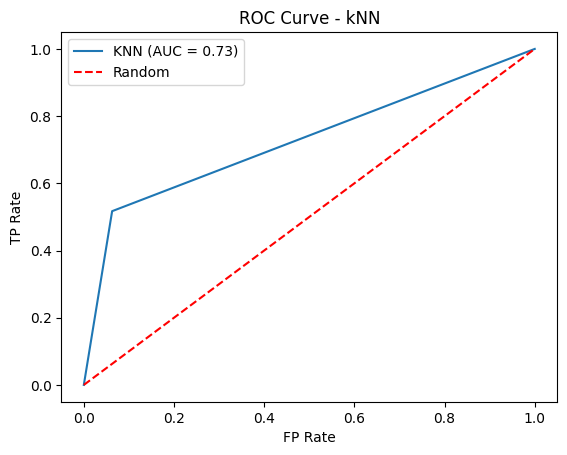

In [406]:
auc_knn = roc_auc_score(y_test_KNN, y_pred_KNN)

fpr_knn, tpr_knn, _ = roc_curve(y_test_KNN, y_pred_KNN)

plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC Curve - kNN')
plt.legend()
plt.show()

## Naive Bayes Evaluation

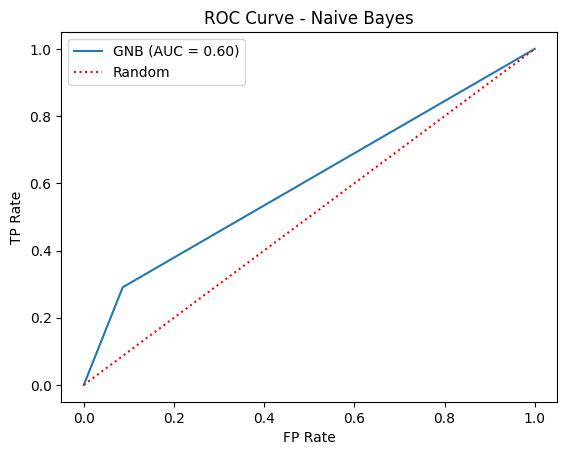

In [407]:
auc_GNB = roc_auc_score(y_test_GNB, y_pred_GNB)

fpr_GNB, tpr_GNB, _= roc_curve(y_test_GNB, y_pred_GNB)

plt.plot(fpr_GNB, tpr_GNB, label=f'GNB (AUC = {auc_GNB:.2f})')

plt.plot([0, 1], [0, 1], linestyle=':', color='red', label='Random')
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend()
plt.show()


## Linear Regression Evalution

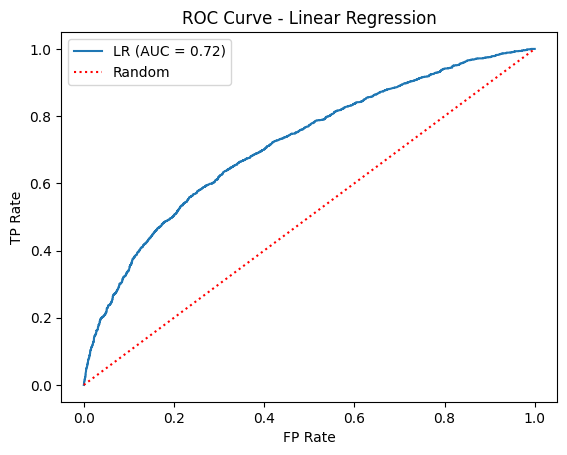

In [408]:
auc_LR = roc_auc_score(y_test_LR, y_pred_LR)

fpr_LR, tpr_LR, _= roc_curve(y_test_LR, y_pred_LR)

plt.plot(fpr_LR, tpr_LR, label=f'LR (AUC = {auc_LR:.2f})')

plt.plot([0, 1], [0, 1], linestyle=':', color='red', label='Random')
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC Curve - Linear Regression')
plt.legend()
plt.show()

## all model visual comaprison

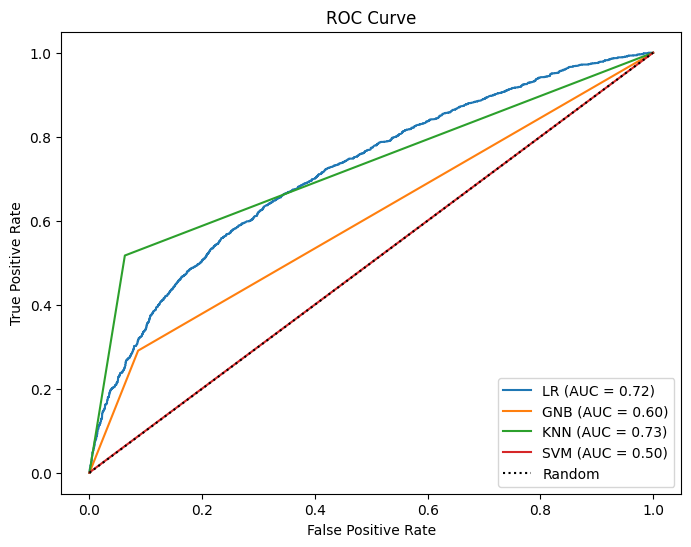

In [409]:
plt.figure(figsize=(8, 6))

plt.plot(fpr_LR, tpr_LR, label=f'LR (AUC = {auc_LR:.2f})')
plt.plot(fpr_GNB, tpr_GNB, label=f'GNB (AUC = {auc_GNB:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_SVM:.2f})')
plt.plot([0, 1], [0, 1], linestyle=':', color='black', label='Random')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Submission Preparation:  
#### Make predictions on the test dataset using the best-performing model. KNN is the model of Choice.

In [410]:

# Predictions on the test data set
y_pred_knn = knn_classifier.predict(X_test_KNN)



# Evaluate the performance
accuracy = accuracy_score(y_test_KNN, y_pred_KNN)
conf_matrix = confusion_matrix(y_test_KNN, y_pred_KNN)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

report = classification_report(y_test_KNN, y_pred_KNN)
print("Classification Report:\n", report)
print("Confusion Matrix: \n", classification_report)

Accuracy: 0.841340782122905
Confusion Matrix:
 [[5179  347]
 [ 789  845]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      5526
           1       0.71      0.52      0.60      1634

    accuracy                           0.84      7160
   macro avg       0.79      0.73      0.75      7160
weighted avg       0.83      0.84      0.83      7160

Confusion Matrix: 
 <function classification_report at 0x00000143504F4680>


## Submission File creation.

In [414]:
# print(train_data)

CustomerID = train_data['Customer Id']  

print(CustomerID.shape)
print(y_pred_knn.shape)


# # Create a DataFrame with test IDs and predictions
submission_df = pd.DataFrame({'Customer Id': CustomerID, 'Claim': y_pred_knn})

submission_df.to_csv('submission.csv', index=False)

(7160,)
(7160,)
